# Origin's street density INDEX 

This code allows you to estimate:
The street density INDEX at the ORIGIN for only one origin point or for a set of origins. The street density is estimated base on a selection of arcs contained within a 600m buffer around each origin. All the arcs selected in relation to each origin are assumed to be previously estimated.  

## Importing libraries

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import math

print ("it works")

it works


### Example for only one route 

In [18]:
route = 1002
db = gpd.read_file('../Shapes/start_arcs600/R' +"%s" % (route) +'_start_arcs600.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,OBJECTID,bridge,from_,highway,name,oneway,osmid,to,ID_PhD,Cyclypath,...,vc80,vc60,vc40,vc30,vc5,Hle,Lle,bnocycle,bcycle,geometry
0,24623,None,4065012367,residential,None,False,404226839,4065012361,24623,0,...,0,0,0.000000,62,0,0.000000,62,1,0,LINESTRING Z (837192.1365999999 1189216.0274 0...
1,1653,None,1834486922,secondary,Calle 20 E,True,30023746,330558734,1653,0,...,0,0,36.857127,0,0,36.857127,0,1,0,LINESTRING Z (836633.4518999998 1189602.7567 0...
2,1654,None,1834486925,residential,Calle 20d,True,30023756,1027336729,1654,0,...,0,0,0.000000,12,0,0.000000,12,1,0,LINESTRING Z (836613.8926999997 1189551.681299...
3,1655,None,3292845893,residential,Calle 20d,True,30023756,1834486925,1655,0,...,0,0,0.000000,35,0,0.000000,35,1,0,LINESTRING Z (836613.8926999997 1189551.681299...
4,23419,None,563801649,tertiary,Calle 110,False,44091557,563801706,23419,0,...,0,0,0.000000,63,0,0.000000,63,1,0,LINESTRING Z (836749.7348999996 1188697.0539 0...


In [19]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 46 columns):
OBJECTID      201 non-null int64
bridge        0 non-null object
from_         201 non-null object
highway       201 non-null object
name          180 non-null object
oneway        201 non-null object
osmid         201 non-null object
to            201 non-null object
ID_PhD        201 non-null object
Cyclypath     201 non-null int64
Ped_path      201 non-null int64
X_from        201 non-null float64
Y_from        201 non-null float64
Z_from        201 non-null float64
X_to          201 non-null float64
Y_to          201 non-null float64
Z_to          201 non-null float64
slope         201 non-null float64
speed         201 non-null float64
v_80          201 non-null float64
v_60          201 non-null float64
v_40          201 non-null float64
v_30          201 non-null float64
v_5           201 non-null float64
Long          201 non-null float64
Cycle_long    201 non-null f

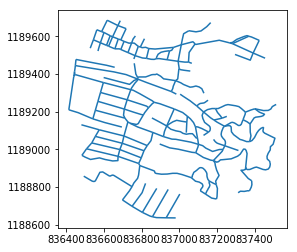

In [20]:
db.plot()

In [21]:
radio = 0.6
area = 3.14159265358979 * radio**2
O_Lstreet = (db['Long']).sum()/1000
O_streetdens = O_Lstreet / area 

In [22]:
print ("O_Lstreet:" + str(O_Lstreet))
print ("O_streetdens:" + str(O_streetdens))

O_Lstreet:17.11859713499747
O_streetdens:15.136163071297819


In [23]:
results = pd.DataFrame ({
        "route":[route],
        "O_Lstreet":[O_Lstreet],
        "O_streetdens":[O_streetdens]})
results.to_csv('../Tables/OUT/R' +"%s" %(route)+'_start_sd600.txt',index=False, header=True)

### Street density estimated for All routes 

The code requires the list of the origin points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [13]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

In [14]:
for i in routes:
    db = gpd.read_file('../Shapes/start_arcs600/R' +"%s" % (i) +'_start_arcs600.shp')
    radio = 0.6
    area = 3.14159265358979 * radio**2
    O_Lstreet = (db['Long']).sum()/1000
    O_streetdens = O_Lstreet / area 
    results = pd.DataFrame ({
            "route":[i],
            "O_Lstreet":[O_Lstreet],
            "O_sttdens":[O_streetdens]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_start_sd600.txt',index=False, header=True)

This part of the code summarizes the intersection index related to each origin in only one table. Please copy it to a text file and save. 

In [17]:
print ('route,O_Lstreet,O_sttdens')
for i in routes:
    df=np.loadtxt('../Tables/OUT/R' +"%s" %(i)+'_start_sd600.txt', delimiter=',',skiprows=1)
    print ((df[0]),(df[1]),(df[2])) 

route,O_Lstreet,O_sttdens
1002.0 17.11859713499747 15.136163071297819
1006.0 18.40248442326658 16.271368672969363
1009.0 12.79496110186059 11.313229477942437
1050.0 15.45593005978915 13.666042606100328
1052.0 20.26126371943311 17.914890412423684
1079.0 22.172011945288098 19.604362774361967
1100.0 18.099546806086742 16.0035130106213
1101.0 19.66339361975109 17.3862571808057
1102.0 22.96889096065341 20.308958520704145
1104.0 24.581951696291 21.73521735172732
1124.0 20.29027979487693 17.94054625595708
1128.0 20.36340128755824 18.005199850437574
1132.0 22.980835429283985 20.319519749732823
1134.0 26.665374762792254 23.577367793868152
1137.0 21.70064571157915 19.18758351824314
1147.0 25.137826223086982 22.22671834438537
1151.0 25.304825867633692 22.374378449519806
1381.0 26.84486083207349 23.736068322436168
1392.0 26.31939578307846 23.271455211494036
1397.0 18.18848963229215 16.08215573530549
1398.0 28.26854614958121 24.99488252070677
1399.0 28.41599665387312 25.125257390814827
1401.0 13.21

5305.0 16.309863569809796 14.421085601609208
5306.0 16.309863569809796 14.421085601609208
5307.0 23.5261445181009 20.801678844166986
5309.0 20.104296741300992 17.776101132024106
5310.0 23.95406945089766 21.180047557094053
5311.0 24.660660916455868 21.80481158203925
5316.0 25.9164878185544 22.91520635502127
5317.0 19.04886329847957 16.842893079082295
5318.0 7.811240794336689 6.906653244998601
5319.0 26.649834019363016 23.563626759778785
5320.0 22.10153483600498 19.542047328155103
5322.0 28.60307488972584 25.290670868486337
5323.0 20.074037118285688 17.749345751029757
5324.0 18.912906305012772 16.722680703759217
5325.0 26.788356874415935 23.68610785485031
5326.0 18.32107854472263 16.199390073152657
5327.0 22.24253380708254 19.666717790476575
5328.0 18.46312965554999 16.324990831263037
5329.0 22.14077383729571 19.576742222696264
5331.0 24.63071989509356 21.77833790675574
5332.0 21.449451526579118 18.965479094805946
5333.0 21.18554194138707 18.732131789180134
5334.0 25.562526788774722 22.6

5867.0 28.06714459947517 24.816804452674848
5870.0 25.67974797926799 22.705882379192307
5872.0 19.399999243007986 17.15336541946529
5876.0 22.8345672899352 20.190190319764973
5877.0 23.24850649785979 20.55619293688021
5879.0 16.309863569809796 14.421085601609208
5881.0 19.11869909571987 16.9046414809465
5884.0 18.75435482489996 16.58249041601205
5892.0 21.39930814866888 18.921142614485174
5899.0 6.58606401032087 5.823359126456661
5900.0 19.89338085447117 17.589610543326458
5902.0 23.5261445181009 20.801678844166986
5903.0 9.95383370773254 8.801121318335353
5904.0 24.12627058667832 21.33230679023589
5905.0 21.735994836381753 19.218839006833733
5906.0 17.398744785359987 15.383867978802124
5909.0 12.0268688241122 10.634086795973717
5910.0 23.836840785991722 21.076394659917145
5915.0 22.11516366353319 19.554097857430996
5916.0 21.25195483103588 18.790853676250272
5917.0 24.01659898610258 21.235335804966837
5918.0 18.099546806086742 16.0035130106213
5921.0 27.526937877567843 24.339156841102